CURSO: Análisis Geoespacial (Sem01-2019)  
Profesor: Edier Aristizábal (evaristizabalg@unal.edu.co)  
Curso website: https://unvirtual.medellin.unal.edu.co/course/view.php?id=579

# 03: Construcción del modelo

## Modelo espacial a nivel de cuenca: Torrencialidad

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
torren= pd.read_excel('/content/drive/My Drive/ANALISIS ESPACIAL APLICADO/datos/Cuencas_torrencialidad.xlsx', sheet_name='Hoja2')

In [0]:
torren.columns

Index(['Name', 'Cuenca', 'Main Stream Order', 'Number of streams',
       'Stream Lenght', 'Main Stream Leght ', 'Stream Lenght Ratio',
       'Bifurcation Ratio ', 'Ro Coefficient', 'Lenght of Basin', 'Area ',
       'Perimeter', 'Form Factor', 'Elongation Ratio', 'Circularity Ratio',
       'Compactness Coefficient', 'Texture Ratio', 'Fitness Ratio',
       'Wandering ratio', 'Stream Frequency', 'Drainage Density',
       'Constant Channel mantenance', 'Drainage Intensity',
       'Infiltrarion Number', 'Leght of overland flow', 'Relief',
       'Mean Basin Slope', 'Relief Ratio', 'Rudgeness Number', 'Melton Index',
       'Ln Melton', 'Flash flood record'],
      dtype='object')

In [0]:
torren.dtypes

Name                            object
Cuenca                           int64
Main Stream Order                int64
Number of streams                int64
Stream Lenght                  float64
Main Stream Leght              float64
Stream Lenght Ratio            float64
Bifurcation Ratio              float64
Ro Coefficient                 float64
Lenght of Basin                float64
Area                           float64
Perimeter                      float64
Form Factor                    float64
Elongation Ratio               float64
Circularity Ratio              float64
Compactness Coefficient        float64
Texture Ratio                  float64
Fitness Ratio                  float64
Wandering ratio                float64
Stream Frequency               float64
Drainage Density               float64
Constant Channel mantenance    float64
Drainage Intensity             float64
Infiltrarion Number            float64
Leght of overland flow         float64
Relief                   

In [0]:
torren.head(5)

,Name,Cuenca,Main Stream Order,Number of streams,Stream Lenght,Main Stream Leght,Stream Lenght Ratio,Bifurcation Ratio,Ro Coefficient,Lenght of Basin,Area,Perimeter,Form Factor,Elongation Ratio,Circularity Ratio,Compactness Coefficient,Texture Ratio,Fitness Ratio,Wandering ratio,Stream Frequency,Drainage Density,Constant Channel mantenance,Drainage Intensity,Infiltrarion Number,Leght of overland flow,Relief,Mean Basin Slope,Relief Ratio,Rudgeness Number,Melton Index,Ln Melton,Flash flood record
0,DESMOTADORA (Dabeiba),1,2,3,4.9820,4.048,0.907351,2.00,2.204219,5.904,5.1330,12.454,0.147258,0.433006,0.415876,1.561689,0.160591,0.325036,0.685637,0.584454,0.970583,1.030309,0.602168,0.567260,0.515155,1.319,24.320,0.223408,1.280198,0.582183,-0.540971,1
1,LA ARBOLEDA (Cdad Bolivar) ¿represamiento?,2,2,3,6.5693,5.997,0.531716,2.00,3.761404,8.961,13.5680,18.516,0.168967,0.463828,0.497315,1.428106,0.108015,0.323882,0.669233,0.221108,0.484176,2.065365,0.456670,0.107055,1.032682,1.968,28.100,0.219618,0.952858,0.534278,-0.626839,1
2,LIBORIANA (Salgar),3,3,12,31.8530,18.117,1.496572,3.25,2.099288,20.617,58.6032,47.543,0.137870,0.418977,0.325805,1.764400,0.189302,0.381066,0.878741,0.204767,0.543537,1.839802,0.376731,0.111298,0.919901,2.484,28.860,0.120483,1.350146,0.324482,-1.125524,1
3,LA ARENOSA (San Carlos),4,3,31,26.4590,6.152,2.050357,5.00,2.965810,7.199,12.0600,17.075,0.232704,0.544323,0.519799,1.396877,1.464129,0.360293,0.854563,2.570481,2.193947,0.455800,1.171624,5.639499,0.227900,0.903,20.669,0.125434,1.981134,0.260024,-1.346980,1
4,EL BARRO (Bello),5,2,4,10.4070,7.350,5.128386,3.00,0.584979,9.523,10.6980,20.898,0.117966,0.387554,0.307824,1.815201,0.143554,0.351708,0.771816,0.373902,0.972799,1.027962,0.384357,0.363731,0.513981,1.299,17.790,0.136407,1.263665,0.397153,-0.923434,1


In [0]:
torren.tail(3)

,Name,Cuenca,Main Stream Order,Number of streams,Stream Lenght,Main Stream Leght,Stream Lenght Ratio,Bifurcation Ratio,Ro Coefficient,Lenght of Basin,Area,Perimeter,Form Factor,Elongation Ratio,Circularity Ratio,Compactness Coefficient,Texture Ratio,Fitness Ratio,Wandering ratio,Stream Frequency,Drainage Density,Constant Channel mantenance,Drainage Intensity,Infiltrarion Number,Leght of overland flow,Relief,Mean Basin Slope,Relief Ratio,Rudgeness Number,Melton Index,Ln Melton,Flash flood record
70,"QUEBRADA AGUA FRIA (Contratación, Santander)",71,2,9,23.183,10.146,1.720253,8.0,4.650477,12.510,30.514,32.567,0.194978,0.498250,0.361538,1.674941,0.245647,0.311542,0.811031,0.294947,0.759750,1.316223,0.388216,0.224086,0.658112,1.576,25.196,0.067981,1.197365,0.024035,-3.728250,0
71,"QUEBRADA SANTO CRISTO (Soatá, Boyacá)",72,3,9,28.589,13.976,2.158894,2.5,1.184412,15.841,45.707,38.141,0.182145,0.481575,0.394828,1.602773,0.157311,0.366430,0.882268,0.196906,0.625484,1.598762,0.314806,0.123162,0.799381,2.033,25.220,0.071111,1.271609,0.044975,-3.101655,0
72,"QUEBRADA LIBARE (Salamina, Caldas)",73,2,4,5.103,3.284,1.703763,3.0,1.760809,5.650,8.828,14.635,0.276545,0.593387,0.517949,1.399371,0.204988,0.224394,0.581239,0.453104,0.578047,1.729963,0.783853,0.261915,0.864981,0.563,17.086,0.110327,0.325441,0.063697,-2.753610,0


In [0]:
nombre=torren['Name']
nombre.head(5)

0                         DESMOTADORA (Dabeiba)
1    LA ARBOLEDA (Cdad Bolivar) ¿represamiento?
2                            LIBORIANA (Salgar)
3                       LA ARENOSA (San Carlos)
4                              EL BARRO (Bello)
Name: Name, dtype: object

In [0]:
features=torren.drop(['Name','Cuenca','Flash flood record'],axis=1)
features.head(5)

,Main Stream Order,Number of streams,Stream Lenght,Main Stream Leght,Stream Lenght Ratio,Bifurcation Ratio,Ro Coefficient,Lenght of Basin,Area,Perimeter,Form Factor,Elongation Ratio,Circularity Ratio,Compactness Coefficient,Texture Ratio,Fitness Ratio,Wandering ratio,Stream Frequency,Drainage Density,Constant Channel mantenance,Drainage Intensity,Infiltrarion Number,Leght of overland flow,Relief,Mean Basin Slope,Relief Ratio,Rudgeness Number,Melton Index,Ln Melton
0,2,3,4.9820,4.048,0.907351,2.00,2.204219,5.904,5.1330,12.454,0.147258,0.433006,0.415876,1.561689,0.160591,0.325036,0.685637,0.584454,0.970583,1.030309,0.602168,0.567260,0.515155,1.319,24.320,0.223408,1.280198,0.582183,-0.540971
1,2,3,6.5693,5.997,0.531716,2.00,3.761404,8.961,13.5680,18.516,0.168967,0.463828,0.497315,1.428106,0.108015,0.323882,0.669233,0.221108,0.484176,2.065365,0.456670,0.107055,1.032682,1.968,28.100,0.219618,0.952858,0.534278,-0.626839
2,3,12,31.8530,18.117,1.496572,3.25,2.099288,20.617,58.6032,47.543,0.137870,0.418977,0.325805,1.764400,0.189302,0.381066,0.878741,0.204767,0.543537,1.839802,0.376731,0.111298,0.919901,2.484,28.860,0.120483,1.350146,0.324482,-1.125524
3,3,31,26.4590,6.152,2.050357,5.00,2.965810,7.199,12.0600,17.075,0.232704,0.544323,0.519799,1.396877,1.464129,0.360293,0.854563,2.570481,2.193947,0.455800,1.171624,5.639499,0.227900,0.903,20.669,0.125434,1.981134,0.260024,-1.346980
4,2,4,10.4070,7.350,5.128386,3.00,0.584979,9.523,10.6980,20.898,0.117966,0.387554,0.307824,1.815201,0.143554,0.351708,0.771816,0.373902,0.972799,1.027962,0.384357,0.363731,0.513981,1.299,17.790,0.136407,1.263665,0.397153,-0.923434


In [0]:
label=torren['Flash flood record']

## Modelo espacial a nivel de *grid cell*: Susceptibilidad por MenM

In [0]:
from osgeo import gdal

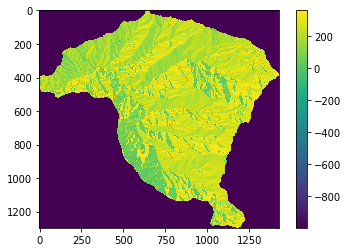

In [0]:
file = gdal.Open('/content/drive/My Drive/ANALISIS ESPACIAL APLICADO/datos/la_miel/Aspecto.tif')
raster = file.GetRasterBand(1)
aspecto = raster.ReadAsArray()
plt.imshow(aspecto)
plt.colorbar();

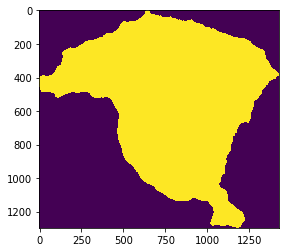

In [0]:
msk=np.where(aspecto==-999,0,1)
plt.imshow(msk);

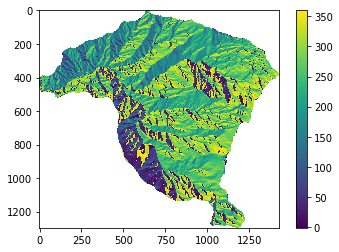

In [0]:
aspecto=np.where(aspecto==-999,np.nan,aspecto)
plt.imshow(aspecto)
plt.colorbar();

In [0]:
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
aspecto_vector_MenM.shape

(910801,)

In [0]:
aspecto_S=pd.Series(aspecto_vector_MenM)
aspecto_S.head(5)

0    208.523560
1    207.437332
2    202.684647
3    211.619766
4    220.028976
dtype: float32

In [0]:

file = gdal.Open('/content/drive/My Drive/ANALISIS ESPACIAL APLICADO/datos/la_miel/Buffer_Drenajes.tif')
raster = file.GetRasterBand(1)
drenajes = raster.ReadAsArray()
drenajes=np.where(drenajes==-999,np.nan,drenajes)
drenajes_vector=drenajes.ravel()
drenajes_vector_MenM=drenajes_vector[~np.isnan(drenajes_vector)]
drenajes_vector_MenM.shape

(910801,)

In [0]:
file = gdal.Open('/content/drive/My Drive/ANALISIS ESPACIAL APLICADO/datos/la_miel/Curvatura_Categorica.tif')
raster = file.GetRasterBand(1)
curvatura = raster.ReadAsArray()
curvatura = np.where(curvatura==-999,np.nan,curvatura)
curvatura_vector=curvatura.ravel()
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)]
curvatura_vector_MenM.shape

(910801,)

In [0]:
file = gdal.Open('/content/drive/My Drive/ANALISIS ESPACIAL APLICADO/datos/la_miel/FlujoAcumulado.tif')
raster = file.GetRasterBand(1)
flujo = raster.ReadAsArray()
flujo = np.where(flujo==-999,np.nan,flujo)
flujo_vector=flujo.ravel()
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)]
flujo_vector_MenM.shape

(910801,)

In [0]:
file = gdal.Open('/content/drive/My Drive/ANALISIS ESPACIAL APLICADO/datos/la_miel/Geologia_Superficial.tif')
raster = file.GetRasterBand(1)
geologia = raster.ReadAsArray()
geologia = np.where(geologia==-999,np.nan,geologia)
geologia_vector=geologia.ravel()
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]
geologia_vector_MenM.shape

(910801,)

In [0]:
file = gdal.Open('/content/drive/My Drive/ANALISIS ESPACIAL APLICADO/datos/la_miel/Pendiente.tif')
raster = file.GetRasterBand(1)
pendiente = raster.ReadAsArray()
pendiente = np.where(pendiente==-999,np.nan,pendiente)
pendiente_vector=pendiente.ravel()
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)]
pendiente_vector_MenM.shape

(910801,)

(910801,)

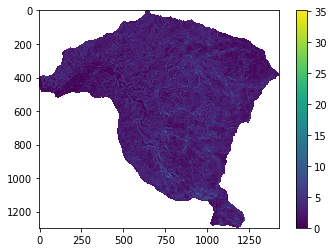

In [0]:
file = gdal.Open('/content/drive/My Drive/ANALISIS ESPACIAL APLICADO/datos/la_miel/Rugosidad.tif')
raster = file.GetRasterBand(1)
rugosidad = raster.ReadAsArray()
rugosidad = np.where(rugosidad==-999,np.nan,rugosidad)
plt.imshow(rugosidad)
plt.colorbar();
rugosidad_vector=rugosidad.ravel()
rugosidad_vector_MenM=rugosidad_vector[~np.isnan(rugosidad_vector)]
rugosidad_vector_MenM.shape

(910801,)

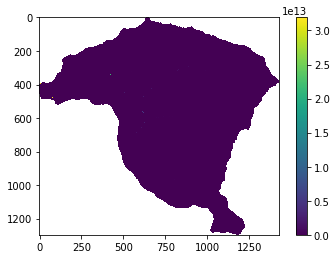

In [0]:
file = gdal.Open('/content/drive/My Drive/ANALISIS ESPACIAL APLICADO/datos/la_miel/SPI.tif')
raster = file.GetRasterBand(1)
SPI = raster.ReadAsArray()
SPI = np.where(SPI==-999,np.nan,SPI)
plt.imshow(SPI)
plt.colorbar();
SPI_vector=SPI.ravel()
SPI_vector_MenM=SPI_vector[~np.isnan(SPI_vector)]
SPI_vector_MenM.shape

(910801,)

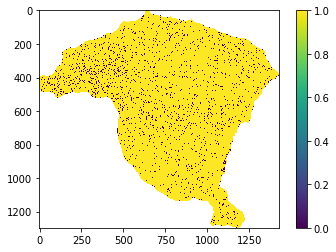

In [0]:
file = gdal.Open('/content/drive/My Drive/ANALISIS ESPACIAL APLICADO/datos/la_miel/STI.tif')
raster = file.GetRasterBand(1)
STI= raster.ReadAsArray()
STI = np.where(STI==-999,np.nan,STI)
plt.imshow(STI)
plt.colorbar();
STI_vector=STI.ravel()
STI_vector_MenM=STI_vector[~np.isnan(STI_vector)]
STI_vector_MenM.shape

(910801,)

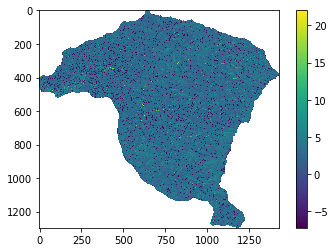

In [0]:
file = gdal.Open('/content/drive/My Drive/ANALISIS ESPACIAL APLICADO/datos/la_miel/TWI.tif')
raster = file.GetRasterBand(1)
TWI = raster.ReadAsArray()
TWI = np.where(TWI==-999,np.nan,TWI)
plt.imshow(TWI)
plt.colorbar();
TWI_vector=TWI.ravel()
TWI_vector_MenM=TWI_vector[~np.isnan(TWI_vector)]
TWI_vector_MenM.shape

(910801,)

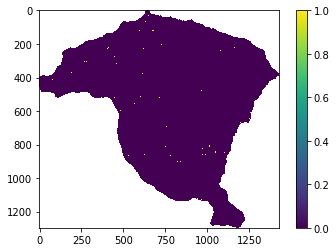

In [0]:
file = gdal.Open('/content/drive/My Drive/ANALISIS ESPACIAL APLICADO/datos/la_miel/Inventario_MenM.tif')
raster = file.GetRasterBand(1)
inventario = raster.ReadAsArray()
inventario=np.where(msk==0,np.nan,inventario)
plt.imshow(inventario)
plt.colorbar()
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
inventario_vector_MenM.shape

In [0]:
d={'inventario':inventario_vector_MenM,'drenajes':drenajes_vector_MenM,'pendiente':pendiente_vector_MenM,'geologia':geologia_vector_MenM,'flujo':flujo_vector_MenM,'aspecto':aspecto_vector_MenM,
   'curvatura':curvatura_vector_MenM,'rugosidad':rugosidad_vector_MenM,'TWI':TWI_vector_MenM,'STI':STI_vector_MenM,'SPI':SPI_vector_MenM}
df = pd.DataFrame(d)
print(list(df.columns))
X=df.drop('inventario',axis=1)
print(X.columns)
y=df['inventario']
print(y.shape)

['inventario', 'drenajes', 'pendiente', 'geologia', 'flujo', 'aspecto', 'curvatura', 'rugosidad', 'TWI', 'STI', 'SPI']
Index(['drenajes', 'pendiente', 'geologia', 'flujo', 'aspecto', 'curvatura',
       'rugosidad', 'TWI', 'STI', 'SPI'],
      dtype='object')
(910801,)
